<a href="https://colab.research.google.com/github/gonzalo-marrero/OIII-level-populations/blob/main/Nebulosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poblaciones relativas de los niveles del O III.

# Parte I. Módulos, declaración de constantes, funciones, importación de datos.

1. Instalación de los módulos

In [1]:
pip install astropy

In [2]:
#Importación de los modulos necesarios para resolver el código:
from astropy.io.ascii import read
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

2. Declaración de las constantes

In [3]:
#Constantes:
KB = 8.617*10**(-5) #Cte. Boltzmann (eV/K)
h = 4.136*10**(-15) #Cte. Planck (eV·s)
c = 3*10**(8) # Velocidad de la luz (m/s)

3. Creación de las funciones

In [4]:
#Funciones:
# Se define el coeficiente de excitación colisional:
def Qex(Te, omega, w_ex, deltaE): #Temp_electrónica, fuerza de colisión, peso estadístico, diferencia energética entre niveles.
  Qex = ((8.629*10**(-6)* omega)/ (np.sqrt(Te)*w_ex))* np.exp(-deltaE/(KB*Te))
  return Qex
# Se define el coeficiente de desexcitación colisional:
def Qdesex(Te, omega, w_dex): #Temperatura electrónica, fuerza de colisión, peso estadístico
    q_desex = ( (8.629*10**(-6) * omega) / (np.sqrt(Te)* w_dex) )
    return q_desex
# Se define la expresión de la densidad crítica:
def n_c(A, q_ex, q_desex):
    n_c = np.sum(A) / (np.sum(q_ex) + np.sum(q_desex)) # Suma de coeficientes de Einstein. Suma de coeficientes de excitación y desexcitación.
    return n_c
# Se define la expresión correspondiente al coeficiente de emisión:
def j_i(ldo, n, A):
    ldo = ldo * 10**(-10)
    rho = c / ldo
    j = ((h * rho) / (4 * np.pi))* n * A
    return j

4. Importación de los datos

In [8]:
# Importar librerías
import pandas as pd
import numpy as np
from pathlib import Path

# Ruta del archivo
data_path = Path("data/DataOIII.txt")

# Leer el archivo, ignorando líneas que comienzan con '#' y usando cualquier cantidad de espacios como separador
data = pd.read_csv(data_path, comment='#', sep='\s+', engine='python')

#Asignación de cada columna de datos a un array:
x=data['Transición'] #Diferencias de transiciones
y=data['Lamda'] # Longitud de onda
z=data['A'] #Coeficiente de Einstein
aa = data['Omega5000K'] # Fuerza de colisión para 5000 K
bb = data['Omega10000K'] # Fuerza de colisión para 10000 K
cc = data['Omega15000K'] # Fuerza de colisión para 15000 K
dd = data['Omega20000K'] # Fuerza de colisión para 20000 K
# DIFERENCIA ENERGIA ENTRE NIVELES
E_niveles = data['E_transicion']  # Diferencia energetica entre niveles [eV]

# NIST
w_ex = np.array([1, 1, 3, 1, 3, 5, 1, 3, 5, 5])
w_desex = np.array([3, 5, 5, 5, 5, 5, 1, 1, 1, 1])

#El orden de las transiciones es el siguiente: 3P1-3P0, 3P2-3P0, 3P2-3P1, 1D2-3P0, 1D2-3P1, 1D2-3P2, 1S0-3P0, 1S0-3P1, 1S0-3P2, 1S0-1D2
#Para el peso estadistico de la excitacion/desexcitacion se elige en nivel más bajo/alto de la transicion
#El peso estadístico se obtiene haciendo para cada nivel 2J+1 y usando el NIST (https://physics.nist.gov/cgi-bin/ASD/energy1.pl?de=0&spectrum=O+III&submit=Retrieve+Data&units=1&format=0&output=0&page_size=15&multiplet_ordered=0&conf_out=on&term_out=on&level_out=on&unc_out=1&j_out=on&lande_out=on&perc_out=on&biblio=on&temp=)


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-513424567.py:10: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(data_path, comment='#', sep='\s+', engine='python')


# Parte II. Desarrollo del entregable

## Cálculo de densidades críticas

In [9]:
##### DENSIDADES CRITICAS NIVELES  T_e = 10000K#####
# DATOS NECESARIOS
omega_10000 = bb # Fuerzas de colision para T_electronica de 10.000K
A_array = z # Coeficientes de Einstein

#Fuerzas de colision para T_e de 10000K incluidas en la variable omega_10000 siguen el orden:
# q_P0P1, q_P0P2, q_P1P2, q_P0D2, q_P1D2, q_P2D2, q_P0S0, q_P1S0, q_P2S0, q_D2S0.

#DIFERENCIACIÓN ENTRE EXCITACIONES Y DESEXCITACIONES:
  #Se crean los arrays correspondientes para resolver el sistema matricial:
    #Excitaciones:
P0_qindex = np.array([1,1,0,1,0,0,1,0,0,0])
P1_qindex = np.array([0,0,1,0,1,0,0,1,0,0])
P2_qindex = np.array([0,0,0,0,0,1,0,0,1,0])
D2_qindex = np.array([0,0,0,0,0,0,0,0,0,1])
S0_qindex = np.array([0,0,0,0,0,0,0,0,0,0])

    #Desexcitaciones:
P0_qindex_d = np.array([0,0,0,0,0,0,0,0,0,0])
P1_qindex_d = np.array([1,0,0,0,0,0,0,0,0,0])
P2_qindex_d = np.array([0,1,1,0,0,0,0,0,0,0])
D2_qindex_d = np.array([0,0,0,1,1,1,0,0,0,0])
S0_qindex_d = np.array([0,0,0,0,0,0,1,1,1,1])

P0_Aindex = np.array([0,0,0,0,0,0,0,0,0,0])
P1_Aindex = np.array([1,0,0,0,0,0,0,0,0,0])
P2_Aindex = np.array([0,1,1,0,0,0,0,0,0,0])
D2_Aindex = np.array([0,0,0,1,1,1,0,0,0,0])
S0_Aindex = np.array([0,0,0,0,0,0,1,1,1,1])

#Aplicando las funciones que hemos definido anteriormente para los coeficientes de excitación y desexcitación colisional:
# COEFICIENTE DE EXCITACION/DESEXCITACION COLISIONAL
q_ex = Qex(10000, omega_10000, w_ex, E_niveles) # Para la temperatura electrónica de 10000 K
q_desex = Qdesex(10000, omega_10000, w_desex) # Para la temperatura electrónica de 10000 K.

#Tras calcular los coeficientes, se calcula la densidad crítica para cada uno de los niveles involucrados:
  # DENSIDAD CRITICA P0:
q_ex_P0 = q_ex * P0_qindex #Coeficiente EXC para el nivel PO. Se multiplica el valor por el array correspondiente.
q_desex_P0 = q_desex * P0_qindex_d #Coeficiente DESEX para el nivel P0. Se multiplica el valor por el array correspondiente.
A_P0 = A_array * P0_Aindex #Coeficiente de Einstein para el PO. Se multiplica por el array correspondiente.

n_c_P0 = n_c(A_P0, q_ex_P0, q_desex_P0) #Se evalua la función creada para la densidad crítica, para los parámetros calculados.

  # DENSIDAD CRITICA P1:
q_ex_P1 = q_ex * P1_qindex #Coeficiente EXC para el nivel P1. Se multiplica el valor por el array correspondiente.
q_desex_P1 = q_desex * P1_qindex_d #Coeficiente DESEX para el nivel P1. Se multiplica el valor por el array correspondiente.
A_P1 = A_array * P1_Aindex #Coeficiente de Einstein para el P1. Se multiplica por el array correspondiente.

n_c_P1 = n_c(A_P1, q_ex_P1, q_desex_P1) #Se evalua la función creada para la densidad crítica, para los parámetros calculados.

  # DENSIDAD CRITICA P2:
q_ex_P2 = q_ex * P2_qindex #Coeficiente EXC para el nivel P2. Se multiplica el valor por el array correspondiente.
q_desex_P2 = q_desex * P2_qindex_d #Coeficiente DESEX para el nivel P2. Se multiplica el valor por el array correspondiente.
A_P2 = A_array * P2_Aindex #Coeficiente de Einstein para el P2. Se multiplica por el array correspondiente.

n_c_P2 = n_c(A_P2, q_ex_P2, q_desex_P2) #Se evalua la función creada para la densidad crítica, para los parámetros calculados.


  # DENSIDAD CRITICA D2:
q_ex_D2 = q_ex * D2_qindex #Coeficiente EXC para el nivel D2. Se multiplica el valor por el array correspondiente.
q_desex_D2 = q_desex * D2_qindex_d #Coeficiente DESEX para el nivel D2. Se multiplica el valor por el array correspondiente.
A_D2 = A_array * D2_Aindex #Coeficiente de Einstein para el D2. Se multiplica por el array correspondiente.

n_c_D2 = n_c(A_D2, q_ex_D2, q_desex_D2) #Se evalua la función creada para la densidad crítica, para los parámetros calculados.

# DENSIDAD CRITICA S0:
q_ex_S0 = q_ex * S0_qindex #Coeficiente EXC para el nivel S0. Se multiplica el valor por el array correspondiente.
q_desex_S0 = q_desex * S0_qindex_d #Coeficiente DESEX para el nivel S0. Se multiplica el valor por el array correspondiente.
A_S0 = A_array * S0_Aindex #Coeficiente de Einstein para el S0. Se multiplica por el array correspondiente.

n_c_S0 = n_c(A_S0, q_ex_S0, q_desex_S0) #Se evalua la función creada para la densidad crítica, para los parámetros calculados.

# SE IMPRIMEN POR PANTALLA LOS RESULTADOS PARA LAS DENSIDADES CRÍTICAS:
print("n_c(P0) = ", "{0:.2f}".format(n_c_P0))
print("n_c(P1) = ", "{0:.2f}".format(n_c_P1))
print("n_c(P2) = ", "{0:.2f}".format(n_c_P2))
print("n_c(D2) = ", "{0:.2f}".format(n_c_D2))
print("n_c(S0) = ", "{0:.2f}".format(n_c_S0))



n_c(P0) =  0.00
n_c(P1) =  500.89
n_c(P2) =  3529.96
n_c(D2) =  691209.94
n_c(S0) =  24224616.06


## Población relativa de niveles en función de la densidad electrónica (Te = 10000 K).

<>:120: SyntaxWarning: invalid escape sequence '\m'
<>:120: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-840567528.py:120: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Poblaciones relativas para $\mathrm{T_e}$ = 10000 K')


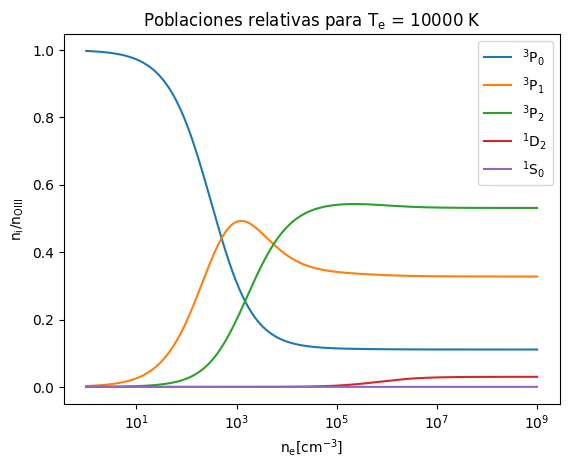

In [10]:
# Se llama a las variables correspondientes:
T_e = 10000 # Temperatura electrónica
omega_10000 = bb #Coeficiente Omega a 10000 K
A = z # Coeficiente de Einstein
ne_array = np.logspace(0, 9, 1000) #Se crea un array para la densidad electrónica.

# Q excitacion/desexcitacion:
q_ex = Qex(T_e, omega_10000, w_ex, E_niveles)  #Se llama a la función para los coef. excitación para Te, Omega10000K, pesos est. ,E_niveles
q_desex = Qdesex(T_e, omega_10000, w_desex) #Se llama a la función para los coef. Desexc, para Te, Omega10000K, pesos est.

q_P0P1 = q_ex[0] #Coef.Exc transición P0-P1
q_P0P2 = q_ex[1] #Coef.Exc transición P0-P2
q_P1P2 = q_ex[2] #Coef.Exc transición P1-P2
q_P0D2 = q_ex[3] #Coef.Exc transición P0-D2
q_P1D2 = q_ex[4] #Coef.Exc transición P1-D2
q_P2D2 = q_ex[5] #Coef.Exc transición P2-D2
q_P0S0 = q_ex[6] #Coef.Exc transición P0-S0
q_P1S0 = q_ex[7] #Coef.Exc transición P1-S0
q_P2S0 = q_ex[8] #Coef.Exc transición P2-S0
q_D2S0 = q_ex[9] #Coef.Exc transición D2-S0

q_P1P0 = q_desex[0] #Coef.Des_Exc transición P1-P0
q_P2P0 = q_desex[1] #Coef.Des_Exc transición P2-P0
q_P2P1 = q_desex[2] #Coef.Des_Exc transición P2-P1
q_D2P0 = q_desex[3] #Coef.Des_Exc transición D2-P0
q_D2P1 = q_desex[4] #Coef.Des_Exc transición D2-P1
q_D2P2 = q_desex[5] #Coef.Des_Exc transición D2-P2
q_S0P0 = q_desex[6] #Coef.Des_Exc transición S0-P0
q_S0P1 = q_desex[7] #Coef.Des_Exc transición S0-P1
q_S0P2 = q_desex[8] #Coef.Des_Exc transición S0-P2
q_S0D2 = q_desex[9] #Coef.Des_Exc transición S0-D2

# Probabilidades de transición:
A_P1P0 = A[0] #Coef. Einstein P1-P0
A_P2P0 = A[1] #Coef. Einstein P2-P0
A_P2P1 = A[2] #Coef. Einstein P2-P1
A_D2P0 = A[3] #Coef. Einstein D2-P0
A_D2P1 = A[4] #Coef. Einstein D2-P1
A_D2P2 = A[5] #Coef. Einstein D2-P2
A_S0P0 = A[6] #Coef. Einstein S0-P0
A_S0P1 = A[7] #Coef. Einstein S0-P1
A_S0P2 = A[8] #Coef. Einstein S0-P2
A_S0D2 = A[9] #Coef. Einstein S0-D2

# SISTEMA DE ECUACIONES
n_i = [] #Se crea un array vacío para ir almacenando los valores de densidad
#Se resuelve cada ecuación del sistema matricial, para cada valor de ne.
for ne in ne_array: #Se recorre para cada valor de densidad electrónica, el array de densidad electrónica.
    ec11 = ne*(q_P0P1 + q_P0P2 + q_P0D2 + q_P0S0)
    ec12 = -(ne*q_P1P0 + A_P1P0)
    ec13 = -(ne*q_P2P0 + A_P2P0)
    ec14 = -(ne*q_D2P0 + A_D2P0)
    ec15 = -(ne*q_S0P0 + A_S0P0)

    ec21 = -(ne*q_P0P1)
    ec22 = ne*(q_P1P0 + q_P1P2 + q_P1D2 + q_P1S0) + (A_P1P0)
    ec23 = -(ne*q_P2P1 + A_P2P1)
    ec24 = -(ne*q_D2P1 + A_D2P1)
    ec25 = -(ne*q_S0P1 + A_S0P1)

    ec31 = -(ne*q_P0P2)
    ec32 = -(ne*q_P1P2)
    ec33 = ne*(q_P2P0 + q_P2P1 + q_P2D2 + q_P2S0) + (A_P2P0 + A_P2P1)
    ec34 = -(ne*q_D2P2 + A_D2P2)
    ec35 = -(ne*q_S0P2 + A_S0P2)

    ec41 = -(ne*q_P0D2)
    ec42 = -(ne*q_P1D2)
    ec43 = -(ne*q_P2D2)
    ec44 = ne*(q_D2P0 + q_D2P1 + q_D2P2 + q_D2S0) + (A_D2P0 + A_D2P1 + A_D2P2)
    ec45 = -(ne*q_S0D2 + A_S0D2)

    ec51 = -(ne*q_P0S0)
    ec52 = -(ne*q_P1S0)
    ec53 = -(ne*q_P2S0)
    ec54 = -(ne*q_D2S0)
    ec55 = ne*(q_S0P0 + q_S0P1 + q_S0P2 + q_S0D2) + (A_S0P0 + A_S0P1 + A_S0P2 + A_S0D2)
    #Ecuaciones de cierre:
    ec_cierre1 = 1
    ec_cierre2 = 1
    ec_cierre3 = 1
    ec_cierre4 = 1
    ec_cierre5 = 1
    #Se almacena en una variable, el array con todos los resultados obtenidos tras aplicar el bucle for:
    A = np.array([[ec11, ec12, ec13, ec14, ec15], \
        [ec21, ec22, ec23, ec24, ec25], \
            [ec31, ec32, ec33, ec34, ec35], \
                [ec41, ec42, ec43, ec44, ec45], \
                    [ec_cierre1, ec_cierre2, ec_cierre3, ec_cierre4, ec_cierre5]])
    #Se crea el array resultante, de ceros, menos el último parámetro que es 1 (correspondiente a las ecs. cierre)
    B = np.array([0,0,0,0,1])
    #Se resuelve el sistema matricial
    sol = np.linalg.solve(A,B)
    n_i.append(sol) #Se almacena la solución en un array, de 5 posiciones: una por cada nivel

#Se crea las listas vacías para almacenar los resultados:
nP0 = []
nP1 = []
nP2 = []
nD2 = []
nS0 = []
#Se lee el array n_i, y para cada posición (cada nivel), se almacena los resultados de densidad, obtenidos por nivel.
for i in range(len(n_i)):
    nP0.append(n_i[i][0])
    nP1.append(n_i[i][1])
    nP2.append(n_i[i][2])
    nD2.append(n_i[i][3])
    nS0.append(n_i[i][4])

# Se realiza el gráfico entre las densidades de cada nivel normalizadas, frente a la densidad electrónica:
fig, ax = plt.subplots()
ax.plot(ne_array, nP0, label = r'$\mathrm{^3P_0}$')
ax.plot(ne_array, nP1, label = r'$\mathrm{^3P_1}$')
ax.plot(ne_array, nP2, label = r'$\mathrm{^3P_2}$')
ax.plot(ne_array, nD2, label = r'$\mathrm{^1D_2}$')
ax.plot(ne_array, nS0, label = r'$\mathrm{^1S_0}$')
ax.set_xscale('log') #Se escala a log.
ax.set_xlabel(r'$\mathrm{n_e [cm^{-3}]}$')
ax.set_ylabel(r'$\mathrm{n_i / n_{O III}}$')
plt.title('Poblaciones relativas para $\mathrm{T_e}$ = 10000 K')
ax.legend()
plt.savefig("PoblacionesRelativas1.png")
plt.show()


## Población relativa de niveles en función de la temperatura electrónica (n_e = 100 cm-3).

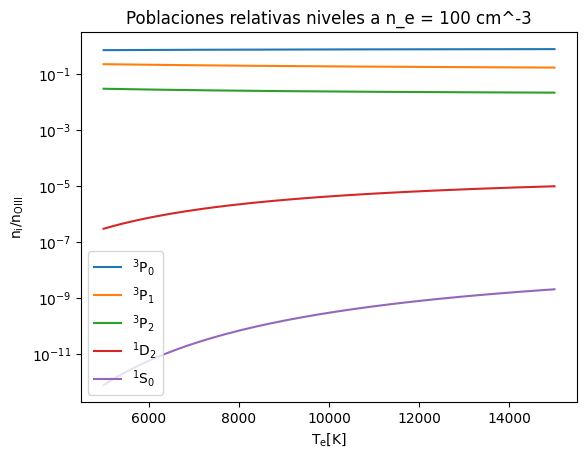

In [13]:
# ------------------------------
# Cálculo de poblaciones relativas de O III
# ------------------------------

# Densidad electrónica [cm^-3]
n_e = 100

# Coeficientes de Einstein (A)
A_P1P0, A_P2P0, A_P2P1, A_D2P0, A_D2P1, A_D2P2, A_S0P0, A_S0P1, A_S0P2, A_S0D2 = z

# Rango de temperaturas [K]
Te_array = np.linspace(5000, 15000, 10000)

# ------------------------------
# Interpolación de Omega
# ------------------------------
from scipy.interpolate import interp1d

omega_interp = []
for i in range(len(data)):
    # Omega5000K, Omega10000K, Omega15000K
    omega_vals = [aa[i], bb[i], cc[i]]
    f_interp = interp1d([5000, 10000, 15000], omega_vals, kind='quadratic')
    omega_interp.append(f_interp)

# Asignación de cada transición
omegainterp_P1P0, omegainterp_P2P0, omegainterp_P2P1, omegainterp_D2P0, \
omegainterp_D2P1, omegainterp_D2P2, omegainterp_S0P0, omegainterp_S0P1, \
omegainterp_S0P2, omegainterp_S0D2 = omega_interp

# ------------------------------
# Cálculo de densidades de niveles
# ------------------------------
n_i = []

for Te in Te_array:
    # Omega interpolada a esta temperatura
    omega_interpolada = np.array([
        float(omegainterp_P1P0(Te)),
        float(omegainterp_P2P0(Te)),
        float(omegainterp_P2P1(Te)),
        float(omegainterp_D2P0(Te)),
        float(omegainterp_D2P1(Te)),
        float(omegainterp_D2P2(Te)),
        float(omegainterp_S0P0(Te)),
        float(omegainterp_S0P1(Te)),
        float(omegainterp_S0P2(Te)),
        float(omegainterp_S0D2(Te))
    ])

    # Coeficientes de excitación y desexcitación
    q_ex = Qex(Te, omega_interpolada, w_ex, E_niveles)
    q_desex = Qdesex(Te, omega_interpolada, w_desex)

    # Desempaquetar q_ex y q_desex
    q_P0P1, q_P0P2, q_P1P2, q_P0D2, q_P1D2, q_P2D2, q_P0S0, q_P1S0, q_P2S0, q_D2S0 = q_ex
    q_P1P0, q_P2P0, q_P2P1, q_D2P0, q_D2P1, q_D2P2, q_S0P0, q_S0P1, q_S0P2, q_S0D2 = q_desex

    # ------------------------------
    # Construcción de la matriz del sistema
    # ------------------------------
    A_mat = np.array([
        [n_e*(q_P0P1 + q_P0P2 + q_P0D2 + q_P0S0), -(n_e*q_P1P0 + A_P1P0), -(n_e*q_P2P0 + A_P2P0), -(n_e*q_D2P0 + A_D2P0), -(n_e*q_S0P0 + A_S0P0)],
        [-(n_e*q_P0P1), n_e*(q_P1P0 + q_P1P2 + q_P1D2 + q_P1S0) + A_P1P0, -(n_e*q_P2P1 + A_P2P1), -(n_e*q_D2P1 + A_D2P1), -(n_e*q_S0P1 + A_S0P1)],
        [-(n_e*q_P0P2), -(n_e*q_P1P2), n_e*(q_P2P0 + q_P2P1 + q_P2D2 + q_P2S0) + (A_P2P0 + A_P2P1), -(n_e*q_D2P2 + A_D2P2), -(n_e*q_S0P2 + A_S0P2)],
        [-(n_e*q_P0D2), -(n_e*q_P1D2), -(n_e*q_P2D2), n_e*(q_D2P0 + q_D2P1 + q_D2P2 + q_D2S0) + (A_D2P0 + A_D2P1 + A_D2P2), -(n_e*q_S0D2 + A_S0D2)],
        [1,1,1,1,1]  # ecuación de cierre
    ])

    B_vec = np.array([0,0,0,0,1])

    # Resolver el sistema
    sol = np.linalg.solve(A_mat, B_vec)
    n_i.append(sol)

# ------------------------------
# Preparar arrays para graficar
# ------------------------------
n_i = np.array(n_i)
nP0, nP1, nP2, nD2, nS0 = n_i.T

# ------------------------------
# Gráfico
# ------------------------------
fig, ax = plt.subplots()
ax.plot(Te_array, nP0, label = r'$\mathrm{^3P_0}$')
ax.plot(Te_array, nP1, label = r'$\mathrm{^3P_1}$')
ax.plot(Te_array, nP2, label = r'$\mathrm{^3P_2}$')
ax.plot(Te_array, nD2, label = r'$\mathrm{^1D_2}$')
ax.plot(Te_array, nS0, label = r'$\mathrm{^1S_0}$')
ax.set_yscale('log')
ax.set_xlabel(r'$\mathrm{T_e [K]}$')
ax.set_ylabel(r'$\mathrm{n_i / n_{O III}}$')
ax.legend()
plt.title('Poblaciones relativas niveles a n_e = {} cm^-3'.format(n_e))
plt.savefig("PoblacionesRelativas2.png")
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3146979080.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Poblaciones relativas niveles a $\mathrm{n_e}$ $\mathrm{cm^-3}$ (ampliada) ')


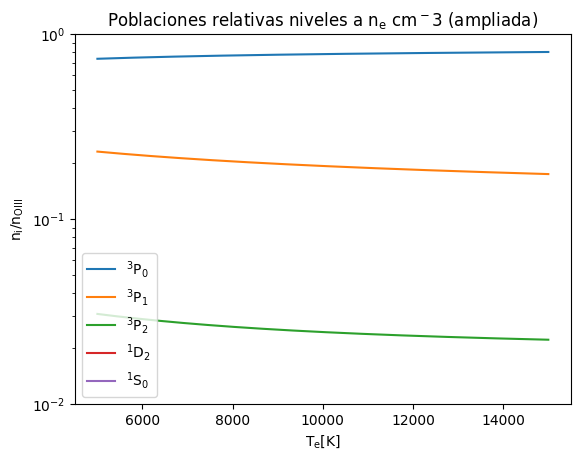

In [14]:
# GRAFICADO DE AMPLIACIÓN DE LOS NIVELES 3P2, 3P1, 3P0:
fig, ax1 = plt.subplots()
ax1.plot(Te_array, nP0, label = r'$\mathrm{^3P_0}$')
ax1.plot(Te_array, nP1, label = r'$\mathrm{^3P_1}$')
ax1.plot(Te_array, nP2, label = r'$\mathrm{^3P_2}$')
ax1.plot(Te_array, nD2, label = r'$\mathrm{^1D_2}$')
ax1.plot(Te_array, nS0, label = r'$\mathrm{^1S_0}$')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{T_e [K]}$')
ax1.set_ylabel(r'$\mathrm{n_i / n_{O III}}$')
ax1.legend()
ax1.set_ylim([0.01,1]) #Acordamos los límites para acotar la visualización de los niveles.
plt.title('Poblaciones relativas niveles a $\mathrm{n_e}$ $\mathrm{cm^-3}$ (ampliada) ')
plt.savefig("PoblacionesRelativas3.png")
plt.show()


## Cociente de los coeficientes de las líneas de emisión.

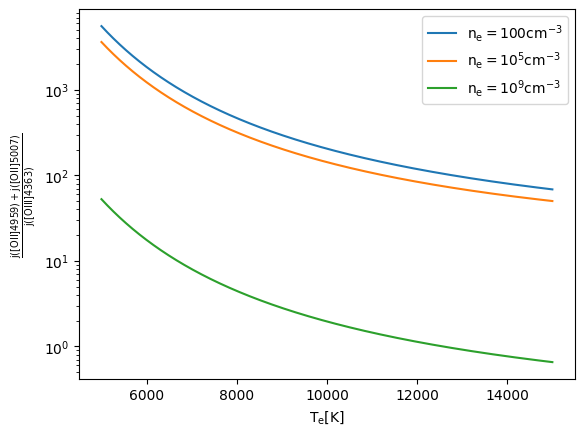

In [15]:
#Se crean y llaman las variables correspondientes:
n_e = (100, 10**5, 10**9) #Se almacenan los valores de las densidades
Te_array = np.linspace(5000, 15000, 10000) #Se crea el array de temperaturas.
omega_10000 = bb # Fuerzas de colision para T_electronica de 10.000K
A = z # Coeficientes de Einstein
#Se recorre para cada posición de densidad electrónica del medio, hasta llegar a las densidades objetivo, poniendo condicionales.
for ne in n_e:
    if ne == 100:
        ni_100 = []
    elif ne == 10**5:
        ni_105 = []
    elif ne == 10**9:
        ni_109 = []
    #Para cada posición del array de temperaturas, se va almacenando el valor de la omega interpolada, para cada una de las transiciones.
    for Te in Te_array:
        omega_interpolada = np.array([float(omegainterp_P1P0(Te)), float(omegainterp_P2P0(Te)), float(omegainterp_P2P1(Te)),  \
            float(omegainterp_D2P0(Te)), float(omegainterp_D2P1(Te)), float(omegainterp_D2P2(Te)), float(omegainterp_S0P0(Te)), \
                float(omegainterp_S0P1(Te)), float(omegainterp_S0P2(Te)), float(omegainterp_S0D2(Te))])

        #Se calculan los coeficientes de excitación y desexcitación para cada una de las omegas interpoladas.
        q_ex = Qex(Te, omega_interpolada, w_ex, E_niveles)
        q_desex = Qdesex(Te, omega_interpolada, w_desex)

        q_P0P1 = q_ex[0] #Coef.Exc transición P0-P1
        q_P0P2 = q_ex[1] #Coef.Exc transición P0-P2
        q_P1P2 = q_ex[2] #Coef.Exc transición P1-P2
        q_P0D2 = q_ex[3] #Coef.Exc transición P0-D2
        q_P1D2 = q_ex[4] #Coef.Exc transición P1-D2
        q_P2D2 = q_ex[5] #Coef.Exc transición P2-D2
        q_P0S0 = q_ex[6] #Coef.Exc transición P0-S0
        q_P1S0 = q_ex[7] #Coef.Exc transición P1-S0
        q_P2S0 = q_ex[8] #Coef.Exc transición P2-S0
        q_D2S0 = q_ex[9] #Coef.Exc transición D2-S0

        q_P1P0 = q_desex[0] #Coef.Des_Exc transición P1-P0
        q_P2P0 = q_desex[1] #Coef.Des_Exc transición P2-P0
        q_P2P1 = q_desex[2] #Coef.Des_Exc transición P2-P1
        q_D2P0 = q_desex[3] #Coef.Des_Exc transición D2-P0
        q_D2P1 = q_desex[4] #Coef.Des_Exc transición D2-P1
        q_D2P2 = q_desex[5] #Coef.Des_Exc transición D2-P2
        q_S0P0 = q_desex[6] #Coef.Des_Exc transición S0-P0
        q_S0P1 = q_desex[7] #Coef.Des_Exc transición S0-P1
        q_S0P2 = q_desex[8] #Coef.Des_Exc transición S0-P2
        q_S0D2 = q_desex[9] #Coef.Des_Exc transición S0-D2

        # Se resuelve el sistema de ecuaciones matricial:
        ec11 = ne*(q_P0P1 + q_P0P2 + q_P0D2 + q_P0S0)
        ec12 = -(ne*q_P1P0 + A_P1P0)
        ec13 = -(ne*q_P2P0 + A_P2P0)
        ec14 = -(ne*q_D2P0 + A_D2P0)
        ec15 = -(ne*q_S0P0 + A_S0P0)

        ec21 = -(ne*q_P0P1)
        ec22 = ne*(q_P1P0 + q_P1P2 + q_P1D2 + q_P1S0) + (A_P1P0)
        ec23 = -(ne*q_P2P1 + A_P2P1)
        ec24 = -(ne*q_D2P1 + A_D2P1)
        ec25 = -(ne*q_S0P1 + A_S0P1)

        ec31 = -(ne*q_P0P2)
        ec32 = -(ne*q_P1P2)
        ec33 = ne*(q_P2P0 + q_P2P1 + q_P2D2 + q_P2S0) + (A_P2P0 + A_P2P1)
        ec34 = -(ne*q_D2P2 + A_D2P2)
        ec35 = -(ne*q_S0P2 + A_S0P2)

        ec41 = -(ne*q_P0D2)
        ec42 = -(ne*q_P1D2)
        ec43 = -(ne*q_P2D2)
        ec44 = ne*(q_D2P0 + q_D2P1 + q_D2P2 + q_D2S0) + (A_D2P0 + A_D2P1 + A_D2P2)
        ec45 = -(ne*q_S0D2 + A_S0D2)

        ec51 = -(ne*q_P0S0)
        ec52 = -(ne*q_P1S0)
        ec53 = -(ne*q_P2S0)
        ec54 = -(ne*q_D2S0)
        ec55 = ne*(q_S0P0 + q_S0P1 + q_S0P2 + q_S0D2) + (A_S0P0 + A_S0P1 + A_S0P2 + A_S0D2)
        #Ecuaciones de cierre:
        ec_cierre1 = 1
        ec_cierre2 = 1
        ec_cierre3 = 1
        ec_cierre4 = 1
        ec_cierre5 = 1
        #Se almacenan los resultados en un array:
        A = np.array([[ec11, ec12, ec13, ec14, ec15], \
            [ec21, ec22, ec23, ec24, ec25], \
                [ec31, ec32, ec33, ec34, ec35], \
                    [ec41, ec42, ec43, ec44, ec45], \
                        [ec_cierre1, ec_cierre2, ec_cierre3, ec_cierre4, ec_cierre5]])
        #Se crea el array resultante, de ceros, menos el último parámetro que es 1 (correspondiente a las ecs. cierre)
        B = np.array([0,0,0,0,1])
        #Se resuelve el sistema matricial:
        sol = np.linalg.solve(A, B)

        if ne == 100:
            ni_100.append(sol)
        elif ne == 10**5:
            ni_105.append(sol)
        elif ne == 10**9:
            ni_109.append(sol)
    #Imponemos las condiciones, para cada la transición correspondiente a cada línea, se almacene en el array correspondiente:
    if ne == 100:
        nD2_100 = []
        nS0_100 = []

        for i in range(len(ni_100)):
            nD2_100.append(ni_100[i][3])
            nS0_100.append(ni_100[i][4])

    elif ne == 10**5:
        nD2_105 = []
        nS0_105 = []

        for i in range(len(ni_105)):
            nD2_105.append(ni_105[i][3])
            nS0_105.append(ni_105[i][4])

    elif ne == 10**9:
        nD2_109 = []
        nS0_109 = []

        for i in range(len(ni_109)):
            nD2_109.append(ni_109[i][3])
            nS0_109.append(ni_109[i][4])


nD2_100 = np.array(nD2_100)
nS0_100 = np.array(nS0_100)
nD2_105 = np.array(nD2_105)
nS0_105 = np.array(nS0_105)
nD2_109 = np.array(nD2_109)
nS0_109 = np.array(nS0_109)

#Se realiza el cálculo de las poblaciones referidas al cociente:
#Se pone la longitud de onda, la densidad y el coeficiente de Einstein: Se calcula el cociente para cada densidad:
cociente_100 = (j_i(4959, nD2_100, A_D2P1) + j_i(5007, nD2_100, A_D2P2)) / j_i(4363, nS0_100, A_S0D2)
cociente_105 = (j_i(4959, nD2_105, A_D2P1) + j_i(5007, nD2_105, A_D2P2)) / j_i(4363, nS0_105, A_S0D2)
cociente_109 = (j_i(4959, nD2_109, A_D2P1) + j_i(5007, nD2_109, A_D2P2)) / j_i(4363, nS0_109, A_S0D2)

# Se realiza el gráfico correspondiente de los tres cocientes:
fig, ax = plt.subplots()
ax.plot(Te_array, cociente_100, label = r'$\mathrm{n_e = 100 cm^{-3}}$')
ax.plot(Te_array, cociente_105, label = r'$\mathrm{n_e = 10^5 cm^{-3}}$')
ax.plot(Te_array, cociente_109, label = r'$\mathrm{n_e = 10^9 cm^{-3}}$')
ax.set_yscale('log') #Escala log.
ax.set_xlabel(r'$\mathrm{T_e [K]}$')
ax.set_ylabel(r'$\mathrm{\frac{j([OII]4959) + j([OII]5007)}{j([OIII]4363)}}$')
ax.legend()
plt.savefig("Cociente.png")
plt.show()
